# Logistic Regression

## 1. 기본

### 1.1 개념

- 의미: '독립변수 X를 바탕으로 종속변수 Y를 예측한다'는 점에선 Linear regression과 동일하다. 다른 점은 종속변수 Y가 명목변수, 즉 classification에서 class를 의미한다. 즉 어떤 데이터를 A인지 B인지를 판별
- 수식의 결과로 "이 데이터는 A다!"를 나타낼 수 없으므로 확률을 사용한다. A, B가 될 확률을 각각 계산하고 0.5 이상이면 positive 판별을 한다. 두 개일 때라서 0.5고 3개 이상(multinomial logistic regression)이면 가장 높은 확률을 가진 class로 판별한다.
- Linear regression만을 쓰면 계산 안됨 : Y를 확률, X를 feature로 해서 Linear regression을 해보면 Y값이 0 이하인 경우가 나온다. 확률이 음수인 경우는 없으므로 Y 값을 0에서 1 사이로 제한을 해줄 필요가 있다.
- Logistic function(or Sigmoid function): 제한을 할 때 사용하고 이를 활용한 regression을 Logistic regression이라 한다. 정확히 말하면 Logistic function 중 standard 형태를 Sigmoid function이라 하고 이 형태를 사용하는 것. logistic function의 정의와 속성은 다음과 같다.
    + `g(x) = 1 / (1 + e^-x)`
    + `1 - g(x) = g(-x)`
    + `g(x)의 x에 대한 미분값 = d/dx * g(x) = g(x) * (1 - g(x))`

> Logistic function 대신 CDF를 쓸 수도 있는데 이 때는 Probit regression이라고 한다.

### 1.2 Decision boundary

- Decision boundary
    + `f(x) = b0 + b1*x`
    + `g(x) = 1 / (1 + exp(-x))`
    + `P(Y=Yes) = g(f(x)) = 1 / (1 + exp(-f(x)) = 1 / (1 + exp(-(b0 + b1*x)))`
    + `P(Y=No) = 1 - P(Y = Yes) = 1 - g(f(x)) = g(-f(x)) = 1 / (1 + exp(b0 + b1*x))`
- Log odds 사용한다. 아래 식이 0보다 크면 yes다.
    + `log( P(Y=Yes) / P(Y=No) )`
- 위 Log odds를 풀어쓰면 결국 **f(x)**로 유도되고 0보다 크면 Yes다.
    + `log( g(f(x)) / g(-f(x)) )`
    + `log( 1 + exp(f(x)) / 1 + exp(-f(x)) )`
    + `log( exp(f(x)) )`
    + `f(x)`

### 1.4 데이터

```
   Unnamed: 0  default  student      balance       income
0           1        0        0   729.526495  44361.62507
1           2        0        1   817.180407  12106.13470
2           3        0        0  1073.549164  31767.13895
3           4        0        0   529.250605  35704.49394
4           5        0        0   785.655883  38463.49588
```

- 자료
    - `default` : 파산 여부
    - `student` : 학생 여부
    - `balance` : 자산
    - `income` : 수입
- 학생 여부, 자산, 수입 데이터를 기반으로 파산 여부를 예측해본다.

## 2. Simple Logistic Regression

Independent variable: Balance
Linear Coefficients: [ 0.00061851]
Linear Intercept: -0.2849174862797101
Logistic Coefficients: [[ 0.00437833]]
Logistic Intercept: [-5.58917553]
Score: 0.84328358209


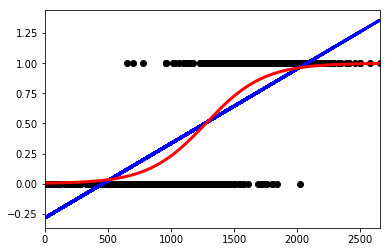

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import pandas as pd


def main():
    data = pd.read_csv("./Default.csv", header=0)
    response_var = 1
    y_vec = data.ix[:, response_var].as_matrix().squeeze()
    x_vec = data.ix[:, 3].as_matrix().reshape(-1, 1)

    one_var_default(x_vec, y_vec)


def one_var_default(x_vec, y_vec, rs=108):
    x_train, x_test, y_train, y_test = train_test_split(x_vec, y_vec, test_size=0.2, random_state=rs)

    regr_linear = linear_model.LinearRegression()
    regr_linear.fit(x_train, y_train)

    regr_logistic = linear_model.LogisticRegression()
    regr_logistic.fit(x_train, y_train)
    
    score = regr_logistic.score(x_test, y_test)

    print("Independent variable: {}".format("Balance"))
    print("Linear Coefficients: {}".format(regr_linear.coef_))
    print("Linear Intercept: {}".format(regr_linear.intercept_))
    print("Logistic Coefficients: {}".format(regr_logistic.coef_))
    print("Logistic Intercept: {}".format(regr_logistic.intercept_))
    print("======\nScore:", score)

    x_minmax = np.arange(x_vec.min(), x_vec.max()).reshape(-1, 1)
    plt.plot(x_vec, regr_linear.predict(x_vec), color='blue', linewidth=3)
    plt.plot(x_minmax, regr_logistic.predict_proba(x_minmax)[:, 1], color='red', linewidth=3)
    plt.scatter(x_vec, y_vec, color='black')

    plt.xlim((x_vec.min(), x_vec.max()))

    # filename = "default_logit_fig.png"
    # plt.savefig(filename)
    plt.show()
    plt.close()


if __name__ == "__main__":
    main()


- 실제 데이터 분포와 Linear, Logical regression 그래프를 모두 그렸다. X는 balance, Y는 파산 여부(default)이다.
- black dots: 실제 데이터 분포다. balance에 대한 파산 여부를 점으로 찍음
- blue line
    + `plt.plot(x_vec, regr_linear.predict(x_vec), color='blue', linewidth=3)`
    + X 값과 Linear regression 모델의 predict 값을 활용해서 직선 긋기
- red line:
    + `x_minmax = np.arange(x_vec.min(), x_vec.max()).reshape(-1, 1)` : x의 최소값에서부터 최대값까지의 모든 자연수를 벡터화
    + `plt.plot(x_minmax, regr_logistic.predict_proba(x_minmax)[:, 1], color='red', linewidth=3)`
    + 모든 x 범위의 자연수에 대해서 Logistic regression 모델의 예측값을 그래프로 그림
- coefficient, intercept
    + Linear에선 regression line의 coefficient와 intercept
    + Logistic에선 `b0 + b1*x` 값이 0 이상일 때 Yes로 분류하겠다는 decision boundary를 의미
- 예측 정확도
    + `score = regr_logistic.score(x_test, y_test)`
    + train, test 데이터를 분리하고 학습한 모델을 test 데이터에 적용.
- 결론은 이런 상황에서는 Linear regression이 큰 힘을 발휘하지 못한다라는 것. Logistic을 써야한다.

## 3. Multiple Logistic Regression

simple logistic regression에서와 방식은 똑같고 X 값으로 vector가 아닌 matrix 형태의 데이터를 넣어주면 된다.

In [12]:
from sklearn import linear_model
import pandas as pd
from sklearn.model_selection import train_test_split


def main():
    data = pd.read_csv("./Default.csv", header=0)
    response_var = 1
    y_vec = data.ix[:, response_var].as_matrix().squeeze()
    x_mat = data.ix[:, range(2, 5)].as_matrix().reshape(-1, 3)

    multi_var_default(x_mat, y_vec)


def multi_var_default(x_mat, y_vec, rs=108):
    x_train, x_test, y_train, y_test = train_test_split(x_mat, y_vec, test_size=0.2, random_state=rs)

    regr_logistic = linear_model.LogisticRegression()

    regr_logistic.fit(x_train, y_train)

    score = regr_logistic.score(x_test, y_test)

    print("Indepedent variables: {}".format("ALL"))
    print("Coefficients: {}".format(regr_logistic.coef_))
    print("Intercept: {}".format(regr_logistic.intercept_))
    print("Accuracy: {}".format(score))


if __name__ == "__main__":
    main()

Indepedent variables: ALL
Coefficients: [[ -1.72292013e+00   3.72892638e-03  -7.73316052e-05]]
Intercept: [-1.47626442]
Accuracy: 0.8507462686567164
